In [1]:
import numpy as np
from scipy.optimize import fsolve

In [ ]:
# 3
def f(r, c):
    return 

In [1]:
def f(x, y, a):
    return y + x * y + a * x * y**2
def g(x, y):
    return -x - x**2 + y**2
def h(x, a):
    return x[1] + x[0] * x[1] + a * x[0] * x[1]**2, -x[0] - x[0]**2 + x[1]**2

In [2]:
fsolve(h, [-4.394, 3.862], 0.1)

NameError: name 'fsolve' is not defined

In [3]:
for a in np.arange(0, 10) / 10:
    print("For a = {}".format(a))
    print(fsolve(h, [8, -8], a), fsolve(h, [-8, -8], a))

NameError: name 'np' is not defined

In [4]:
x = 10.467
y = -10.955
x = 1.325
y = -1.755
a = 1
print(f(x, y, a), g(x, y))

0.0006581249999992878 -0.000600000000000378


In [6]:
for a in np.arange(-10, 10):
    print("For a = {}".format(a))
    x0 = 5
    y0 = -10
    ffs = fsolve(f, [x0, y0], a)
    gfs = fsolve(g, [x0, y0])
    if ffs == gfs:
        print(ffs, gfs)

For a = -10


TypeError: f() missing 1 required positional argument: 'a'

In [7]:
a = -0.3
x = -1.035
y = 1.035
tl = y + a * y**2
tr = 1 + x + 2 * a * x * y
bl = -1 - 2 * x
br = 2 * y
print(tl, tr)
print(bl, br)
trace = tl + br
print("Trace: {}".format(trace))
det = tl * br - tr * bl
print("Det: {}".format(det))
print(trace**2 - 4 * det)

0.7136324999999999 0.6077349999999999
1.0699999999999998 2.07
Trace: 2.7836324999999995
Det: 0.8269428249999999
4.440838595056247


In [45]:
def abc(a, b, c):
    s1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2 * a)
    s2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2 * a)
    return s1, s2
print(abc(1, -2, -1))

(2.414213562373095, -0.41421356237309515)


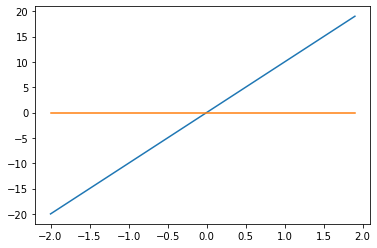

In [27]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(r, c):
    return r * (c - r**2)
def g(r, c):
    return r * (c + 2 * r**2 - r**4)

r1s = np.empty(40)
r2s = np.empty(40)
n = 400
for c in np.arange(-20, 20) / 10:
    # Create constructs to save the data
    r1 = np.empty(n)
    r2 = np.empty(n)
    
    # Initial values
    r1[0] = 2
    r2[0] = 2

    # Calculate steady state
    for i in range(n-1):
        r1[i+1] = r1[i] + f(r1[i], c) * 0.1
        r2[i+1] = r2[i] + g(r2[i], c) * 0.1
    np.append(r1s, r1[-1])
    np.append(r2s, r2[-1])
    
plt.plot(np.arange(-20, 20) / 10, r1s)
plt.plot(np.arange(-20, 20) / 10, r2s)
plt.show()

%% Exercise 1c

% clear; close; clc

% from the plot in 1b we can deduce that there are two roots when 
% lim (x>Inf) f(x) < 0. This limit is equal to a.
% For two roots it is also required that the maximum of the function is
% larger than zero: fmax = 0. Fmax is found where df/dx = 0:
% df/dx = (1-x)exp(-x) = 0 gives xmax = 1 and fmax = f(1) = exp(-1)+a.
% From fmax > 0 we find a > -1/e. So, between a = -1/e and a = 0, we find
% two roots. For higher values of a we'll find one root.

% Matlab has an implementation of the set of functions our f(x) belongs to,
% namely the Lambert W functions:

amin = -1/exp(1); %e is not defined, but exp(1) is
aVal_low = linspace(amin,2,100);      % Define values of a
x_i = 1;
for a = aVal_low
    x_low_branch(1,x_i) = -lambertw(0,a); % Analytic solution
    x_i = x_i+1;
end

aVal_high = linspace(amin,0,100);         % Define values of a
x_i = 1;
for a = aVal_high
    x_up_branch(1,x_i) = -lambertw(-1,a); % Analytic solution
    x_i = x_i+1;
end

figure; hold on
plot(aVal_low, x_low_branch, 'k');
plot(aVal_high, x_up_branch, 'k');
xlabel('a'); ylabel('root');

<ipython-input-1-c058f607c54a>:21: RuntimeWarning: invalid value encountered in sqrt
  r1 = np.sqrt(c)
<ipython-input-1-c058f607c54a>:23: RuntimeWarning: invalid value encountered in sqrt
  d = np.sqrt(4+4*c)
<ipython-input-1-c058f607c54a>:28: RuntimeWarning: invalid value encountered in sqrt
  r2_low = np.sqrt((2 - d) / 2)


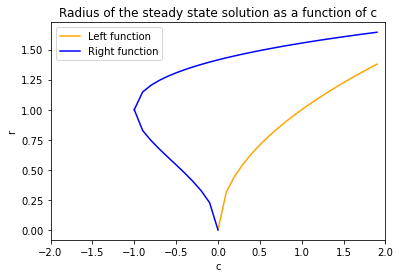

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import ode

def f(r, c):
    return r * (c - r**2)
def g(r, c):
    return r * (c + 2 * r**2 - r**4)

r1s = np.empty(40)
r2hs = np.empty(40)
r2ls = np.empty(40)
n = 40
cs = np.arange(-20, 20) / 10

for i in range(len(cs)):
    c = cs[i]
    r1 = 0
    #if c >= 0:
    r1 = np.sqrt(c)
    
    d = np.sqrt(4+4*c)
    r2_high = 0
    r2_low = 0
    #if d >= 0:
    r2_high = np.sqrt((2 + d) / 2)
    r2_low = np.sqrt((2 - d) / 2)
        
    #if r2_high > 100 or math.isnan(r2_high):
    #    r2_high = 0
    #if r2_low > 100 or math.isnan(r2_low):
    #    r2_low = 0
    
    r1s[i] = r1
    r2hs[i] = r2_high
    r2ls[i] = r2_low

    
plt.plot(cs, r1s, label="Left function", color='orange')
plt.plot(cs, r2hs, label="Right function", color='blue')
plt.plot(cs, r2ls, color='blue')
plt.xlabel("c")
plt.ylabel("r")
plt.xlim(-2, 2)
plt.title("Radius of the steady state solution as a function of c")
plt.legend()
plt.show()